<a href="https://colab.research.google.com/github/SasinduShanaka/Country-Development-Clustering-model/blob/main/Country_Development_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

#KMeans is the main clustering method we use in this model



In [33]:
from sklearn.decomposition import PCA
#Dataset has many columns
#PCA reduces it to 2 dimensions
#Helps visualize clusters

In [34]:
from sklearn.metrics import silhouette_score
#Measures how good the clustering is
#Higher score → better separation

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
#Shows how countries merge at different distances

In [36]:
df = pd.read_csv("country_scores.csv")

In [37]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Data preprocessing

In [38]:
X= df.select_dtypes(include=["int64","float64"])
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [39]:
X.isnull().sum()

,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Calculates mean & std for each column
#Without scaling:GDP dominates distance,Fertility & life expectancy become useless


In [41]:
wcss = [] #Within-Cluster Sum of Squares

#Measures how compact clusters are
#Lower = better


In [42]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
#in here we are determining how many clusters are there in the dataset


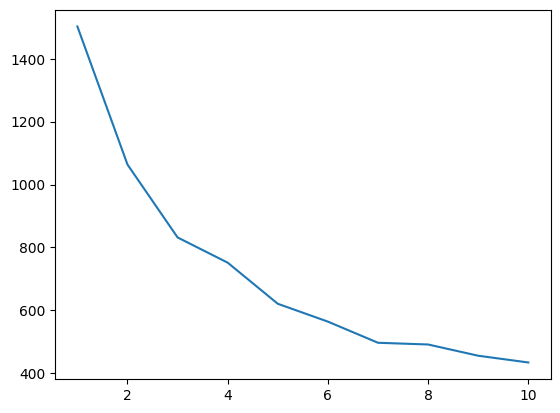

In [43]:
plt.plot(range(1, 11), wcss)
#Look for a bend (elbow),That K is optimal


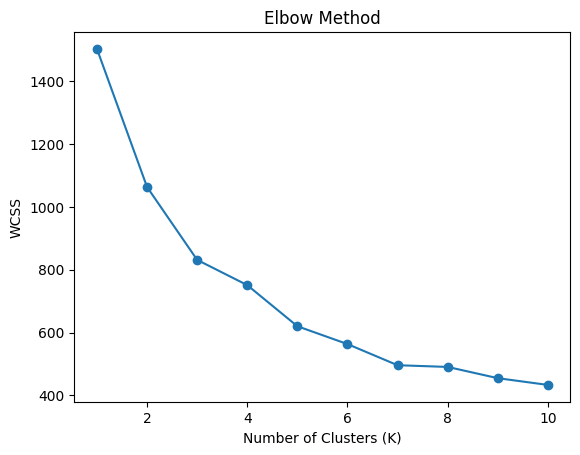

In [44]:
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)



In [46]:
score = silhouette_score(X_scaled, labels)
print(score)


0.30088229124112015


In [47]:
df["Cluster"] = labels
#Adds cluster label to dataset
#Helps analysis and interpretation

In [48]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Dataset has many dimensions
#Humans can only visualize 2D
#PCA preserves maximum information

Text(0.5, 1.0, 'PCA')

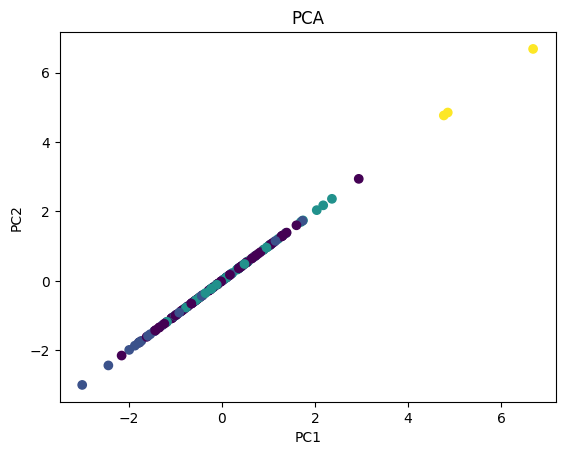

In [49]:
plt.scatter(X_pca[:,1],X_pca[:,1],c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")

In [3]:
df.groupby("labels").mean()
#Shows average GDP, fertility, etc per cluster

NameError: name 'df' is not defined